# Compare Unsupervised Clustering Methods

---
# 0. Sample Data
- Original Code
- [How to Compare and Evaluate Unsupervised Clustering Methods?](https://cdanielaam.medium.com/how-to-compare-and-evaluate-unsupervised-clustering-methods-84f3617e3769)

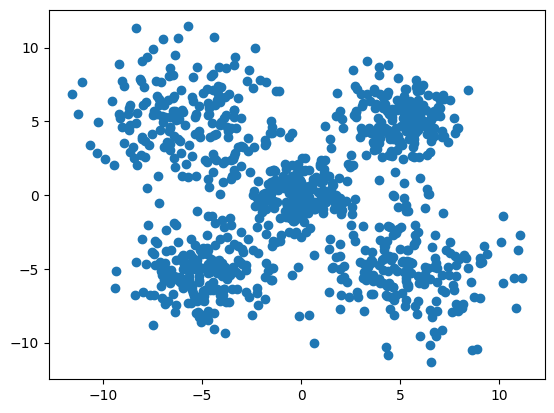

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Set the number of samples and features
n_samples = 1000
n_features = 4

#Create an empty array to store the data
data = np.empty((n_samples, n_features))

#Generate random data for each feature
for i in range(n_features):
  data[:, i] = np.random.normal(size=n_samples)

#Create 5 clusters with different densities and centroids
cluster1 = data[:200, :] + np.random.normal(size=(200, n_features), scale=0.5)
cluster2 = data[200:400, :] + np.random.normal(size=(200, n_features), scale=1) + np.array([5,5,5,5])
cluster3 = data[400:600, :] + np.random.normal(size=(200, n_features), scale=1.5) + np.array([-5,-5,-5,-5])
cluster4 = data[600:800, :] + np.random.normal(size=(200, n_features), scale=2) + np.array([5,-5,5,-5])
cluster5 = data[800:, :] + np.random.normal(size=(200, n_features), scale=2.5) + np.array([-5,5,-5,5])

#Combine the clusters into one dataset
X = np.concatenate((cluster1, cluster2, cluster3, cluster4, cluster5))

# Plot the data
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [2]:
df = pd.DataFrame(X, columns=["feature_1", "feature_2", "feature_3", "feature_4"])
cluster_id = np.concatenate((np.zeros(200), np.ones(200), np.full(200, 2), np.full(200, 3), np.full(200, 4)))
df["cluster_id"] = cluster_id
df

,feature_1,feature_2,feature_3,feature_4,cluster_id
0,-1.139050,0.362648,-1.228530,-0.085487,0.0
1,1.138901,-0.461565,-1.201331,-0.398359,0.0
2,0.129317,-1.855473,-1.623406,1.320840,0.0
3,0.546586,0.535647,1.068532,-1.863920,0.0
4,1.274653,-0.290495,-0.069758,-0.559204,0.0
...,...,...,...,...,...
995,-4.777554,7.174286,-7.821412,3.259854,4.0
996,-3.842490,2.326927,-14.293948,1.958017,4.0
997,-4.710116,1.076945,-6.670448,6.562566,4.0
998,-7.449289,5.667841,-5.547014,4.206457,4.0


---
# 1. Clustering
### 1. K-Means

c:\app\anaconda3\envs\yjformat\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


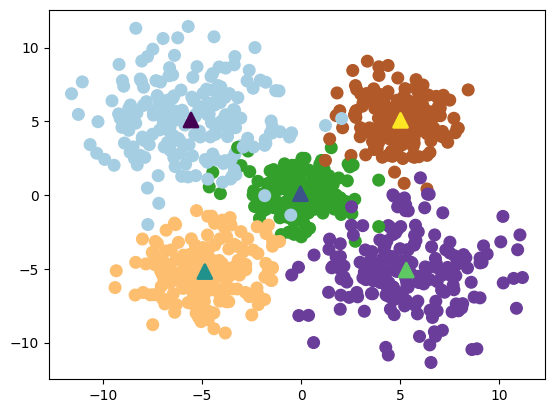

In [3]:
#K-Means
from sklearn.cluster import KMeans

#Define function:
kmeans = KMeans(n_clusters=5)

#Fit the model:
km = kmeans.fit(X)
km_labels = km.labels_

#Print results:
#print(kmeans.labels_)

#Visualise results:
plt.scatter(X[:, 0], X[:, 1], 
            c=kmeans.labels_,      
            s=70, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker='^', s=100, linewidth=2, 
            c=[0, 1, 2, 3, 4])

### 2. Affinity Propagation

10


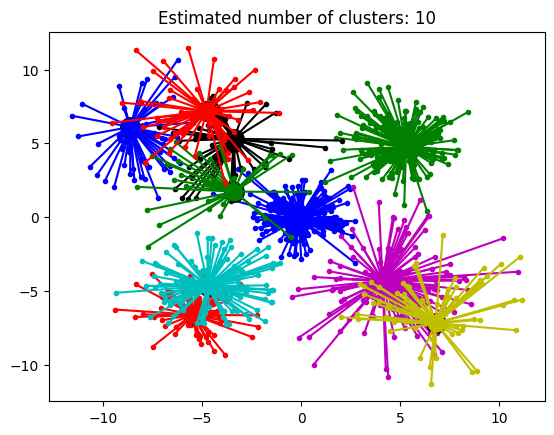

In [5]:
from sklearn.cluster import AffinityPropagation

#Fit the model:
af = AffinityPropagation(preference=-563, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
af_labels = af.labels_
n_clusters_ = len(cluster_centers_indices)

#Print number of clusters:
print(n_clusters_)

import matplotlib.pyplot as plt
from itertools import cycle

plt.close("all")
plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = af_labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

### 3. Agglomerative Clustering

number of estimated clusters : 5


c:\app\anaconda3\envs\yjformat\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


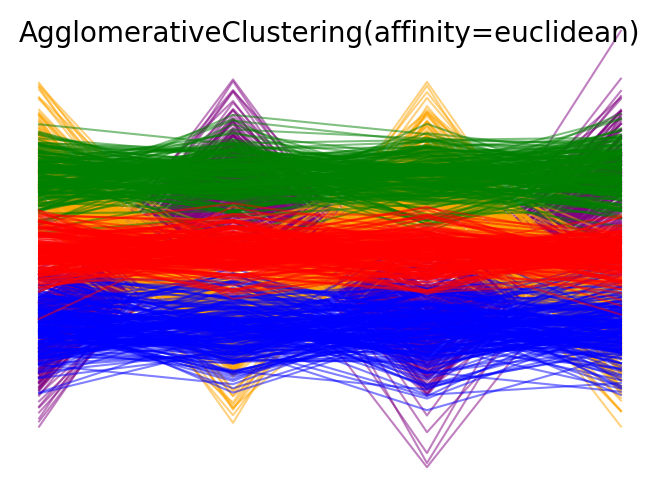

In [6]:
from sklearn.cluster import AgglomerativeClustering

#Fit the model:
clustering = AgglomerativeClustering(n_clusters=5).fit(X)

AC_labels= clustering.labels_
n_clusters = clustering.n_clusters_

print("number of estimated clusters : %d" % clustering.n_clusters_)

# Plot clustering results
colors = ['purple', 'orange', 'green', 'blue', 'red']

for index, metric in enumerate([#"cosine", 
                                "euclidean", 
                                #"cityblock"
                                ]):
    model = AgglomerativeClustering(
        n_clusters=5, linkage="ward", affinity=metric
    )
    model.fit(X)
    plt.figure()
    plt.axes([0, 0, 1, 1])
    for l, c in zip(np.arange(model.n_clusters), colors):
        plt.plot(X[model.labels_ == l].T, c=c, alpha=0.5)
    plt.axis("tight")
    plt.axis("off")
    plt.suptitle("AgglomerativeClustering(affinity=%s)" % metric, size=20)


plt.show()

### 4. Mean Shift Clustering

number of estimated clusters : 5


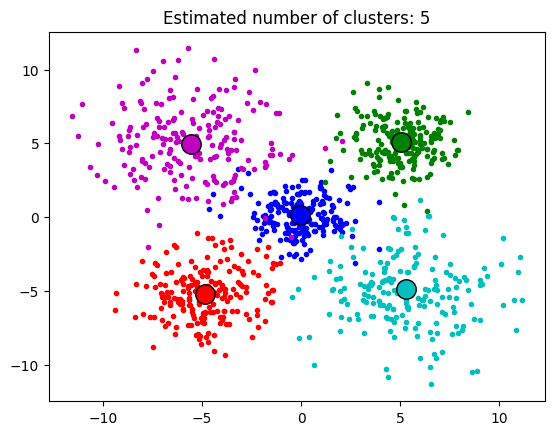

In [9]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=100)

#Fit the model:
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

### 5. Bisecting K-Means

Number of clusters:  5


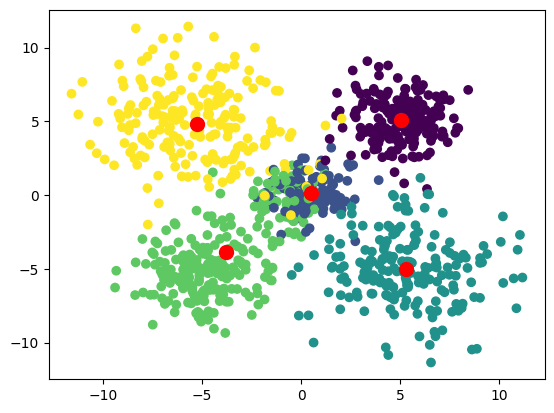

In [8]:
from sklearn.cluster import BisectingKMeans

#Build and fit model:
bisect_means = BisectingKMeans(n_clusters=5).fit(X)
BKM_labels = bisect_means.labels_

#Print model attributes:
#print('Labels: ', bisect_means.labels_)
print('Number of clusters: ', bisect_means.n_clusters)

#Define varaibles to be included in scatterdot:
y= bisect_means.labels_
#print(y)
centers = bisect_means.cluster_centers_

# Visualize the results using a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=100)

plt.show()

### 6. DBSCAN

Estimated number of clusters: 5
Estimated number of noise points: 0


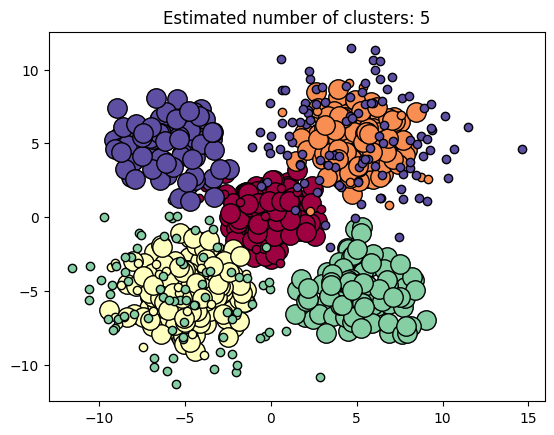

In [10]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=3, min_samples=10).fit(X)
DBSCAN_labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, -1],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

### 7. OPTICS

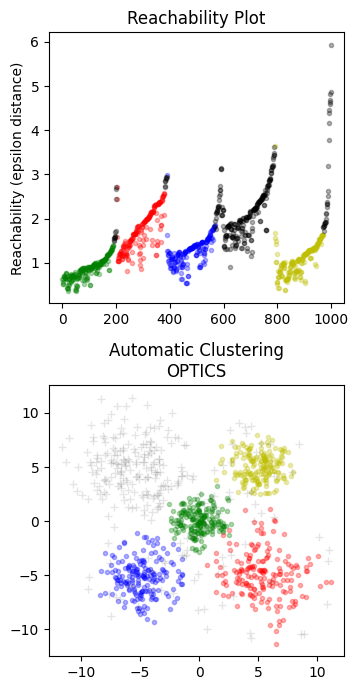

In [11]:
from sklearn.cluster import OPTICS
import matplotlib.gridspec as gridspec

#Build OPTICS model:
clust = OPTICS(min_samples=3, min_cluster_size=100, metric='euclidean')

# Run the fit
clust.fit(X)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
OPTICS_labels = clust.labels_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, 0])
ax2 = plt.subplot(G[1, 0])


# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

# OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")


plt.tight_layout()
plt.show()

### 8. BIRCH

BIRCH without global clustering as the final step took 0.49 seconds
n_clusters : 225
BIRCH with global clustering as the final step took 0.03 seconds
n_clusters : 5


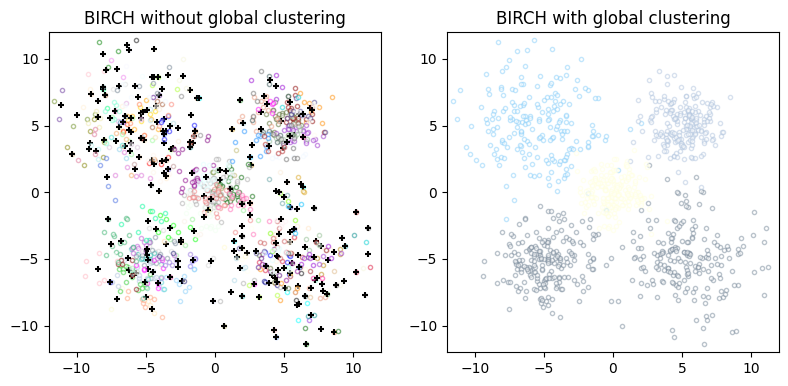

In [12]:
import matplotlib.colors as colors
from sklearn.cluster import Birch, MiniBatchKMeans
from time import time
from itertools import cycle

# Use all colors that matplotlib provides by default.
colors_ = cycle(colors.cnames.keys())

fig = plt.figure(figsize=(12, 4))
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.1, top=0.9)

# Compute clustering with BIRCH with and without the final clustering step
# and plot.
birch_models = [
    Birch(threshold=1.7, n_clusters=None),
    Birch(threshold=1.7, n_clusters=5),
]
final_step = ["without global clustering", "with global clustering"]


for ind, (birch_model, info) in enumerate(zip(birch_models, final_step)):
    t = time()
    birch_model.fit(X)
    print("BIRCH %s as the final step took %0.2f seconds" % (info, (time() - t)))

    # Plot result
    labels = birch_model.labels_
    centroids = birch_model.subcluster_centers_
    n_clusters = np.unique(labels).size
    print("n_clusters : %d" % n_clusters)

    ax = fig.add_subplot(1, 3, ind + 1)
    for this_centroid, k, col in zip(centroids, range(n_clusters), colors_):
        mask = labels == k
        ax.scatter(X[mask, 0], X[mask, 1], c="w", edgecolor=col, marker=".", alpha=0.5)
        if birch_model.n_clusters is None:
            ax.scatter(this_centroid[0], this_centroid[1], marker="+", c="k", s=25)
    ax.set_ylim([-12, 12])
    ax.set_xlim([-12, 12])
    ax.set_autoscaley_on(False)
    ax.set_title("BIRCH %s" % info)

plt.show()

BIRCH_labels = labels

---
# 2. Data Quality Control
### 1) Rand Index
The Rand Index ranges from 0 to 1, with a value of 1 meaning the two clusterings are exactly the same and a value close to 0 indicating that the two clusterings are vastly different.

In [13]:
#comb function:
from math import comb

#math.comb(n,k):
print(comb(len(df['cluster_id']),2))

499500


In [14]:
def rand_index_score(y_true, y_pred):

    # Initialize variables
    a, b = 0,0
    
    # Compute variables
    for i in range(len(y_true)):
        for j in range(i+1, len(y_true)):
            if y_true[i] == y_true[j] and y_pred[i] == y_pred[j]:
                a += 1
            elif y_true[i] != y_true[j] and y_pred[i] != y_pred[j]:
                b += 1
    #combinations
    combinations = comb(len(y_true),2)
    
    # Compute Rand Index
    rand_index = (a + b) / combinations
    print(a)
    print(b)
    
    return rand_index

#Call the function and print result:
print(rand_index_score(df['cluster_id'], km_labels))

97365
397772
0.9912652652652653


In [15]:
from sklearn import metrics

print('Rand Index for K-Means is:', metrics.rand_score(df['cluster_id'], km_labels))
print('Rand Index for Affinity Propagation is:', metrics.rand_score(df['cluster_id'], af_labels))
print('Rand Index for Aglomerative Clustering is:', metrics.rand_score(df['cluster_id'], AC_labels))
print('Rand Index for Mean Shift is:', metrics.rand_score(df['cluster_id'], MS_labels))
print('Rand Index for Bisecting KM is:', metrics.rand_score(df['cluster_id'], BKM_labels))
print('Rand Index for DBSCAN is:', metrics.rand_score(df['cluster_id'], DBSCAN_labels))
print('Rand Index for OPTICS is:', metrics.rand_score(df['cluster_id'], OPTICS_labels))
print('Rand Index for BIRCH is:', metrics.rand_score(df['cluster_id'], BIRCH_labels))

Rand Index for K-Means is: 0.9912652652652653
Rand Index for Affinity Propagation is: 0.9328088088088088
Rand Index for Aglomerative Clustering is: 0.9984064064064064
Rand Index for Mean Shift is: 0.9920660660660661
Rand Index for Bisecting KM is: 0.9436096096096096
Rand Index for DBSCAN is: 0.888922922922923
Rand Index for OPTICS is: 0.9208028028028028
Rand Index for BIRCH is: 0.9984004004004003


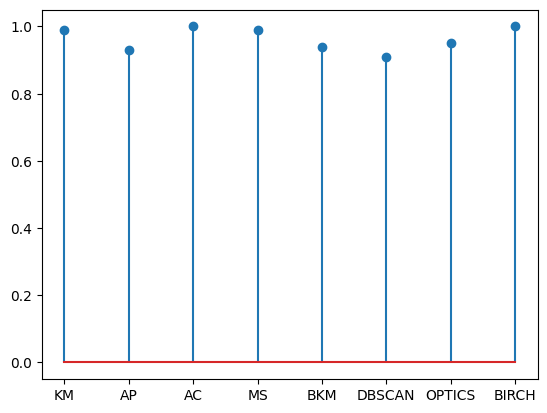

In [16]:
#Build a dataframe:
data = {'Model':["KM", "AP", "AC", "MS", "BKM", "DBSCAN", "OPTICS", "BIRCH"],'Rand_Index':[0.99, 0.93,1, 0.99, 0.94, 0.91, 0.95,1]}
Rand_Index = pd.DataFrame(data)

# Make the plot
y_pos = np.arange(len(Rand_Index['Model']))

plt.stem(Rand_Index['Rand_Index'])
plt.xticks(y_pos, Rand_Index['Model'])
plt.show()

### 2) Adjusted Rand Score

Adjusted Rand Score for K-Means is: 0.9726312356931118
Adjusted Rand Score for Affinity Propagation is: 0.7600834853912944
Adjusted Rand Score for Aglomerative Clustering is: 0.9950050754258711
Adjusted Rand Score for Mean Shift is: 0.975139091526843
Adjusted Rand Score for Bisecting KM is: 0.827000564915151
Adjusted Rand Score for DBSCAN is: 0.686103782023103
Adjusted Rand Score for OPTICS is: 0.754812205797241
Adjusted Rand Score for BIRCH is: 0.9949862314059346


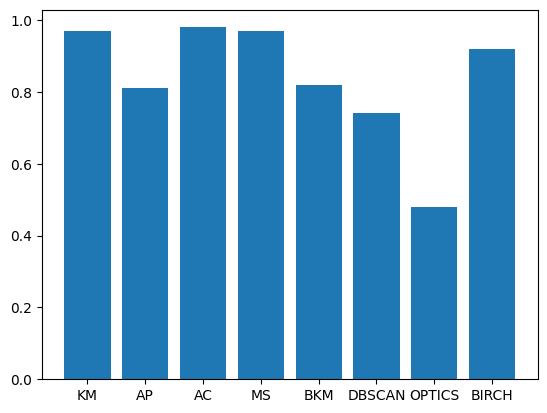

In [17]:
print('Adjusted Rand Score for K-Means is:', metrics.adjusted_rand_score(df['cluster_id'], km_labels))
print('Adjusted Rand Score for Affinity Propagation is:', metrics.adjusted_rand_score(df['cluster_id'], af_labels))
print('Adjusted Rand Score for Aglomerative Clustering is:', metrics.adjusted_rand_score(df['cluster_id'], AC_labels))
print('Adjusted Rand Score for Mean Shift is:', metrics.adjusted_rand_score(df['cluster_id'], MS_labels))
print('Adjusted Rand Score for Bisecting KM is:', metrics.adjusted_rand_score(df['cluster_id'], BKM_labels))
print('Adjusted Rand Score for DBSCAN is:', metrics.adjusted_rand_score(df['cluster_id'], DBSCAN_labels))
print('Adjusted Rand Score for OPTICS is:', metrics.adjusted_rand_score(df['cluster_id'], OPTICS_labels))
print('Adjusted Rand Score for BIRCH is:', metrics.adjusted_rand_score(df['cluster_id'], BIRCH_labels))

data = {'Model':["KM", "AP", "AC", "MS", "BKM", "DBSCAN", "OPTICS", "BIRCH"],'Adj_Rand_Score':[0.97, 0.81,0.98, 0.97, 0.82, 0.74, 0.48, 0.92]}
Adj_Rand_Score = pd.DataFrame(data)

# Make the plot
y_pos = np.arange(len(Adj_Rand_Score['Model']))

plt.bar(y_pos,Adj_Rand_Score['Adj_Rand_Score'])
plt.xticks(y_pos, Adj_Rand_Score['Model'])
plt.show()

### 3) Mutual Information-Based Scores

In [26]:
y_true = df["cluster_id"]
labels_true = np.array(y_true) 
labels_pred = np.array(km_labels)

In [27]:
#Build a matrix with only zeros, and with the size of U and V
contingency_matrix = np.zeros((np.unique(y_true).size, np.unique(km_labels).size))

#Populate the matrix with the intersections between U and V:
for i, j in zip(labels_true, labels_pred):
    contingency_matrix[int(i), int(j)] += 1

In [28]:
contingency_matrix

array([[  0., 200.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 200.],
       [  0.,   0., 200.,   0.,   0.],
       [  0.,   4.,   0., 196.,   0.],
       [193.,   7.,   0.,   0.,   0.]])

In [29]:
pxy = contingency_matrix / len(y_true)
print(pxy)

[[0.    0.2   0.    0.    0.   ]
 [0.    0.    0.    0.    0.2  ]
 [0.    0.    0.2   0.    0.   ]
 [0.    0.004 0.    0.196 0.   ]
 [0.193 0.007 0.    0.    0.   ]]


In [30]:
nzs = pxy > 0
print(nzs)

[[False  True False False False]
 [False False False False  True]
 [False False  True False False]
 [False  True False  True False]
 [ True  True False False False]]


In [31]:
px = np.sum(pxy, axis=1)
print(px)

[0.2 0.2 0.2 0.2 0.2]


In [32]:
py = np.sum(pxy, axis=0)
print(py)

[0.193 0.211 0.2   0.196 0.2  ]


In [33]:
px_py = px[:, np.newaxis] * py[np.newaxis, :]
print(px_py)

[[0.0386 0.0422 0.04   0.0392 0.04  ]
 [0.0386 0.0422 0.04   0.0392 0.04  ]
 [0.0386 0.0422 0.04   0.0392 0.04  ]
 [0.0386 0.0422 0.04   0.0392 0.04  ]
 [0.0386 0.0422 0.04   0.0392 0.04  ]]


In [34]:
mi = (pxy[nzs] * np.log(pxy[nzs] / px_py[nzs])).sum()
print(mi)

1.5590258680681244


In [36]:
MS_labels = labels
print('Mutual Information Based Scores for K-Means is:', metrics.mutual_info_score(df['cluster_id'], km_labels))
print('Mutual Information Based Scores for Affinity Propagation is:', metrics.mutual_info_score(df['cluster_id'], af_labels))
print('Mutual Information Based Scores for Aglomerative Clustering is:', metrics.mutual_info_score(df['cluster_id'], AC_labels))
print('Mutual Information Based Scores for Mean Shift is:', metrics.mutual_info_score(df['cluster_id'], MS_labels))
print('Mutual Information Based Scores for Bisecting KM is:', metrics.mutual_info_score(df['cluster_id'], BKM_labels))
print('Mutual Information Based Scores for DBSCAN is:', metrics.mutual_info_score(df['cluster_id'], DBSCAN_labels))
print('Mutual Information Based Scores for OPTICS is:', metrics.mutual_info_score(df['cluster_id'], OPTICS_labels))
print('Mutual Information Based Scores for BIRCH is:', metrics.mutual_info_score(df['cluster_id'], BIRCH_labels))

Mutual Information Based Scores for K-Means is: 1.5590258680681244
Mutual Information Based Scores for Affinity Propagation is: 1.5938164088642295
Mutual Information Based Scores for Aglomerative Clustering is: 1.5982176052297843
Mutual Information Based Scores for Mean Shift is: 1.596831310868664
Mutual Information Based Scores for Bisecting KM is: 1.3865195334268854
Mutual Information Based Scores for DBSCAN is: 1.247738362175078
Mutual Information Based Scores for OPTICS is: 1.2607257530116265
Mutual Information Based Scores for BIRCH is: 1.596831310868664


### 4) Normalized Mutual Information Score

In [38]:
h_true = -np.sum(px * np.log(px))
h_pred = -np.sum(py * np.log(py))

nmi = mi / ((h_true + h_pred) / 2)
nmi

0.9688160854166696

In [39]:
print('Mutual Information Based Scores for K-Means is:', metrics.normalized_mutual_info_score(df['cluster_id'], km_labels))
print('Mutual Information Based Scores for Affinity Propagation is:', metrics.normalized_mutual_info_score(df['cluster_id'], af_labels))
print('Mutual Information Based Scores for Aglomerative Clustering is:', metrics.normalized_mutual_info_score(df['cluster_id'], AC_labels))
print('Mutual Information Based Scores for Mean Shift is:', metrics.normalized_mutual_info_score(df['cluster_id'], MS_labels))
print('Mutual Information Based Scores for Bisecting KM is:', metrics.normalized_mutual_info_score(df['cluster_id'], BKM_labels))
print('Mutual Information Based Scores for DBSCAN is:', metrics.normalized_mutual_info_score(df['cluster_id'], DBSCAN_labels))
print('Mutual Information Based Scores for OPTICS is:', metrics.normalized_mutual_info_score(df['cluster_id'], OPTICS_labels))
print('Mutual Information Based Scores for BIRCH is:', metrics.normalized_mutual_info_score(df['cluster_id'], BIRCH_labels))

Mutual Information Based Scores for K-Means is: 0.9688160854166696
Mutual Information Based Scores for Affinity Propagation is: 0.8509926019505701
Mutual Information Based Scores for Aglomerative Clustering is: 0.9930346013311965
Mutual Information Based Scores for Mean Shift is: 0.9921716939249499
Mutual Information Based Scores for Bisecting KM is: 0.8695951058570204
Mutual Information Based Scores for DBSCAN is: 0.8087569371623933
Mutual Information Based Scores for OPTICS is: 0.7870683797593647
Mutual Information Based Scores for BIRCH is: 0.9921716939249499


### 5) Adjusted Mutual Information Score

In [40]:
print('Mutual Information Based Scores for K-Means is:', metrics.adjusted_mutual_info_score(df['cluster_id'], km_labels))
print('Mutual Information Based Scores for Affinity Propagation is:', metrics.adjusted_mutual_info_score(df['cluster_id'], af_labels))
print('Mutual Information Based Scores for Aglomerative Clustering is:', metrics.adjusted_mutual_info_score(df['cluster_id'], AC_labels))
print('Mutual Information Based Scores for Mean Shift is:', metrics.adjusted_mutual_info_score(df['cluster_id'], MS_labels))
print('Mutual Information Based Scores for Bisecting KM is:', metrics.adjusted_mutual_info_score(df['cluster_id'], BKM_labels))
print('Mutual Information Based Scores for DBSCAN is:', metrics.adjusted_mutual_info_score(df['cluster_id'], DBSCAN_labels))
print('Mutual Information Based Scores for OPTICS is:', metrics.adjusted_mutual_info_score(df['cluster_id'], OPTICS_labels))
print('Mutual Information Based Scores for BIRCH is:', metrics.adjusted_mutual_info_score(df['cluster_id'], BIRCH_labels))

Mutual Information Based Scores for K-Means is: 0.9686593260093298
Mutual Information Based Scores for Affinity Propagation is: 0.8495225106859666
Mutual Information Based Scores for Aglomerative Clustering is: 0.992999591774825
Mutual Information Based Scores for Mean Shift is: 0.9921323472791402
Mutual Information Based Scores for Bisecting KM is: 0.8689331576335625
Mutual Information Based Scores for DBSCAN is: 0.807751917566213
Mutual Information Based Scores for OPTICS is: 0.785992827117266
Mutual Information Based Scores for BIRCH is: 0.9921323472791402


### 6) Homogeneity and Completeness Score

In [42]:
y_true = y_true.astype(int)
km_labels = km_labels.astype(int)

In [43]:
def entropy(arr):
    #Find unique values and their counts:
    unique, counts = np.unique(arr, return_counts=True)
    #Get the probability for each cluster (unique value):
    p = counts / len(arr)
    #Apply entropy formula:
    entropy = -np.sum(p * np.log2(p))
    return entropy

entropy_y_true = entropy(y_true)
entropy_km_labels = entropy(km_labels)

print('Entropy for y_true: ', entropy_y_true)
print('Entropy for km_labels: ', entropy_km_labels)

Entropy for y_true:  2.321928094887362
Entropy for km_labels:  2.3212625422956608


### 7) Conditional Joint Entropy

In [44]:
import numpy as np
from collections import Counter
import math

def conditional_entropy(X, Y):
    #Build a 2D-numpy array with true clusters and predicted clusters:
    XY = np.column_stack((X, Y))

    #Count the number of observations in X and Y with the same values:
    xy_counts = Counter(map(tuple, XY))

    #Get the joint probability:
    joint_prob = np.array(list(xy_counts.values())) / len(XY)

    #Get conditional probability:
    y_counts = Counter(Y)
    conditional_prob = np.zeros_like(joint_prob)
    for i, (x, y) in enumerate(xy_counts.keys()):
        conditional_prob[i] = xy_counts[(x, y)] / y_counts[y]

    #Get conditional entropy:
    conditional_entropy = -np.sum(joint_prob * np.log2(conditional_prob + 1e-10))

    return conditional_entropy

joint_entropy_y_true = conditional_entropy(y_true, km_labels)
print('Joint entropy for y_true given km_labels is: ', joint_entropy_y_true)

joint_entropy_km_labels = conditional_entropy(km_labels, y_true)
print('Joint entropy for km_labels given y_true is: ', joint_entropy_km_labels)

Joint entropy for y_true given km_labels is:  0.07272920620271664
Joint entropy for km_labels given y_true is:  0.07206365361418901


In [45]:
homogeneity = 1 - (joint_entropy_y_true / entropy_y_true)
print('homogeneity: ', homogeneity)

completeness = 1 - (joint_entropy_km_labels / entropy_km_labels)
print('Completeness: ', completeness)

homogeneity:  0.9686772358012039
Completeness:  0.9689549750185


In [46]:
#Homogeneity:
print('Homogeneity for K-Means is:', metrics.homogeneity_score(df['cluster_id'], km_labels))
print('Homogeneity for Affinity Propagation is:', metrics.homogeneity_score(df['cluster_id'], af_labels))
print('Homogeneity for Aglomerative Clustering is:', metrics.homogeneity_score(df['cluster_id'], AC_labels))
print('Homogeneity for Mean Shift is:', metrics.homogeneity_score(df['cluster_id'], MS_labels))
print('Homogeneity for Bisecting KM is:', metrics.homogeneity_score(df['cluster_id'], BKM_labels))
print('Homogeneity for DBSCAN is:', metrics.homogeneity_score(df['cluster_id'], DBSCAN_labels))
print('Homogeneity for OPTICS is:', metrics.homogeneity_score(df['cluster_id'], OPTICS_labels))
print('Homogeneity for BIRCH is:', metrics.homogeneity_score(df['cluster_id'], BIRCH_labels))

#Completeness:
print('Completeness for K-Means is:', metrics.completeness_score(df['cluster_id'], km_labels))
print('Completeness for Affinity Propagation is:', metrics.completeness_score(df['cluster_id'], af_labels))
print('Completeness for Aglomerative Clustering is:', metrics.completeness_score(df['cluster_id'], AC_labels))
print('Completeness for Mean Shift is:', metrics.completeness_score(df['cluster_id'], MS_labels))
print('Completeness for Bisecting KM is:', metrics.completeness_score(df['cluster_id'], BKM_labels))
print('Completeness for DBSCAN is:', metrics.completeness_score(df['cluster_id'], DBSCAN_labels))
print('Completeness for OPTICS is:', metrics.completeness_score(df['cluster_id'], OPTICS_labels))
print('Completeness for BIRCH is:', metrics.completeness_score(df['cluster_id'], BIRCH_labels))

Homogeneity for K-Means is: 0.9686772357128498
Homogeneity for Affinity Propagation is: 0.9902938141016913
Homogeneity for Aglomerative Clustering is: 0.9930284311574673
Homogeneity for Mean Shift is: 0.9921670780413203
Homogeneity for Bisecting KM is: 0.8614930235674172
Homogeneity for DBSCAN is: 0.7752634336095691
Homogeneity for OPTICS is: 0.7833329532450961
Homogeneity for BIRCH is: 0.9921670780413203
Completeness for K-Means is: 0.9689549749314881
Completeness for Affinity Propagation is: 0.7460485306433549
Completeness for Aglomerative Clustering is: 0.9930407715816025
Completeness for Mean Shift is: 0.9921763098515288
Completeness for Bisecting KM is: 0.8778510302704438
Completeness for DBSCAN is: 0.845275138090473
Completeness for OPTICS is: 0.7908396027218392
Completeness for BIRCH is: 0.9921763098515288


### 8) V-Measure

In [47]:
beta = 1

v_measure = ((1+beta)*homogeneity*completeness) / (beta*homogeneity+completeness)
print('V-Measure is: ', v_measure)

#Or simply:
metrics.v_measure_score(y_true, km_labels)

V-Measure is:  0.9688160855043527


0.9688160854166695

### 9) Fowlkes-Mallows Score

In [48]:
def fowlkes_mallows_score(labels_true, labels_pred):

    n = len(labels_true)
    tp, fp, tn, fn = 0, 0, 0, 0

    for i in range(n):
        for j in range(i + 1, n):
            if labels_true[i] == labels_true[j] and labels_pred[i] == labels_pred[j]:
                tp += 1
            elif labels_true[i] != labels_true[j] and labels_pred[i] == labels_pred[j]:
                fp += 1
            elif labels_true[i] == labels_true[j] and labels_pred[i] != labels_pred[j]:
                fn += 1
            else:
                tn += 1

    FM_score = tp / np.sqrt((tp + fp) * (tp + fn))

    return FM_score

FM_score = fowlkes_mallows_score(y_true, km_labels)
print('Fowlkes Mallows Score is: ', FM_score)

Fowlkes Mallows Score is:  0.9780857249878491


In [49]:
print('Fowlkes Mallows Score for K-Means is:', metrics.fowlkes_mallows_score(df['cluster_id'], km_labels))
print('Fowlkes Mallows Score for Affinity Propagation is:', metrics.fowlkes_mallows_score(df['cluster_id'], af_labels))
print('Fowlkes Mallows Score for Aglomerative Clustering is:', metrics.fowlkes_mallows_score(df['cluster_id'], AC_labels))
print('Fowlkes Mallows Score for Mean Shift is:', metrics.fowlkes_mallows_score(df['cluster_id'], MS_labels))
print('Fowlkes Mallows Score for Bisecting KM is:', metrics.fowlkes_mallows_score(df['cluster_id'], BKM_labels))
print('Fowlkes Mallows Score for DBSCAN is:', metrics.fowlkes_mallows_score(df['cluster_id'], DBSCAN_labels))
print('Fowlkes Mallows Score for OPTICS is:', metrics.fowlkes_mallows_score(df['cluster_id'], OPTICS_labels))
print('Fowlkes Mallows Score for BIRCH is:', metrics.fowlkes_mallows_score(df['cluster_id'], BIRCH_labels))

Fowlkes Mallows Score for K-Means is: 0.9780857249878491
Fowlkes Mallows Score for Affinity Propagation is: 0.8140929662444447
Fowlkes Mallows Score for Aglomerative Clustering is: 0.996000080601593
Fowlkes Mallows Score for Mean Shift is: 0.9959849852641516
Fowlkes Mallows Score for Bisecting KM is: 0.8627685809985153
Fowlkes Mallows Score for DBSCAN is: 0.7627287322961711
Fowlkes Mallows Score for OPTICS is: 0.8045556805172104
Fowlkes Mallows Score for BIRCH is: 0.9959849852641516


### 10) Silhouette Score
a → Mean distance between a sample and all other points in the same class.
b → Mean distance between a sample and all other points in the next nearest cluster.

In [50]:
n_samples = len(X)
cluster_labels = np.unique(km_labels)

n_clusters = len(cluster_labels)
silhouette_vals = np.zeros(n_samples)


for i in range(n_samples):
    a_i = np.mean([np.linalg.norm(X[i] - X[j]) for j in range(n_samples) if km_labels[j] == km_labels[i] and j != i])
    b_i = np.min([np.mean([np.linalg.norm(X[i] - X[j]) for j in range(n_samples) if km_labels[j] == k]) for k in cluster_labels if k != km_labels[i]])
    silhouette_vals[i] = (b_i - a_i) / max(a_i, b_i)

silhouette_score = np.mean(silhouette_vals)
print(silhouette_score)

0.5332762940527825


In [51]:
print('Silhouette Coefficient for K-Means is:', metrics.silhouette_score(X, km_labels, metric='euclidean'))
print('Silhouette Coefficient for Affinity Propagation is:', metrics.silhouette_score(X, af_labels, metric='euclidean'))
print('Silhouette Coefficient for Aglomerative Clustering is:', metrics.silhouette_score(X, AC_labels, metric='euclidean'))
print('Silhouette Coefficient for Mean Shift is:', metrics.silhouette_score(X, MS_labels, metric='euclidean'))
print('Silhouette Coefficient for Bisecting KM is:', metrics.silhouette_score(X, BKM_labels, metric='euclidean'))
print('Silhouette Coefficient for DBSCAN is:', metrics.silhouette_score(X, DBSCAN_labels, metric='euclidean'))
print('Silhouette Coefficient for OPTICS is:', metrics.silhouette_score(X, OPTICS_labels, metric='euclidean'))
print('Silhouette Coefficient for BIRCH is:', metrics.silhouette_score(X, BIRCH_labels, metric='euclidean'))

Silhouette Coefficient for K-Means is: 0.5332762940527825
Silhouette Coefficient for Affinity Propagation is: 0.34858079298616523
Silhouette Coefficient for Aglomerative Clustering is: 0.5292961228043
Silhouette Coefficient for Mean Shift is: 0.5289403546129722
Silhouette Coefficient for Bisecting KM is: 0.40305648993173165
Silhouette Coefficient for DBSCAN is: 0.433041314080537
Silhouette Coefficient for OPTICS is: 0.3259141990839653
Silhouette Coefficient for BIRCH is: 0.5289403546129722


### 11) Calinski-Harabasz Index

In [52]:
def calinski_harabasz_score(X, labels):
    n_samples, _ = X.shape
    n_labels = len(np.unique(labels))
    if n_labels == 1:
        return np.nan
    mean = np.mean(X, axis=0)
    extra_disp, intra_disp = 0., 0.
    for k in range(n_labels):
        cluster_k = X[labels == k]
        mean_k = np.mean(cluster_k, axis=0)
        extra_disp += cluster_k.shape[0] * np.sum((mean_k - mean) ** 2)
        intra_disp += np.sum((cluster_k - mean_k) ** 2)
    chs = (extra_disp / (n_labels - 1)) / (intra_disp / (n_samples - n_labels))
    return chs

CHS = calinski_harabasz_score(X, km_labels)
print(CHS)

1379.1998163450962


In [53]:
print('Calinski-Harabasz Index for K-Means is:', metrics.calinski_harabasz_score(X, km_labels))
print('Calinski-Harabasz Index for Affinity Propagation is:', metrics.calinski_harabasz_score(X, af_labels))
print('Calinski-Harabasz Index for Aglomerative Clustering is:', metrics.calinski_harabasz_score(X, AC_labels))
print('Calinski-Harabasz Index for Mean Shift is:', metrics.calinski_harabasz_score(X, MS_labels))
print('Calinski-Harabasz Index for Bisecting KM is:', metrics.calinski_harabasz_score(X, BKM_labels))
print('Calinski-Harabasz Index for DBSCAN is:', metrics.calinski_harabasz_score(X, DBSCAN_labels))
print('Calinski-Harabasz Index for OPTICS is:', metrics.calinski_harabasz_score(X, OPTICS_labels))
print('Calinski-Harabasz Index for BIRCH is:', metrics.calinski_harabasz_score(X, BIRCH_labels))

Calinski-Harabasz Index for K-Means is: 1379.1998163450965
Calinski-Harabasz Index for Affinity Propagation is: 809.1912712107734
Calinski-Harabasz Index for Aglomerative Clustering is: 1366.9152831563358
Calinski-Harabasz Index for Mean Shift is: 1362.4119533676355
Calinski-Harabasz Index for Bisecting KM is: 980.6405199396153
Calinski-Harabasz Index for DBSCAN is: 493.13905386333016
Calinski-Harabasz Index for OPTICS is: 351.74539627719645
Calinski-Harabasz Index for BIRCH is: 1362.4119533676355


### 12) Davies-Bouldin Index

In [55]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y)**2))

def davies_bouldin(X, labels):
    n_clusters = len(np.bincount(labels))
    cluster_k = [X[labels == k] for k in range(n_clusters)]
    centroids = [np.mean(k, axis=0) for k in cluster_k]
    
    db_indices = []
    for i, k_i in enumerate(cluster_k):
        s_i = np.mean([np.linalg.norm(x - centroids[i]) for x in k_i])
        R = []
        for j, k_j in enumerate(cluster_k):
            if j != i:
                s_j = np.mean([np.linalg.norm(x - centroids[j]) for x in k_j])
                dist = np.linalg.norm(centroids[i] - centroids[j])
                R.append((s_i + s_j) / dist)
        db_indices.append(np.max(R))
    return np.mean(db_indices)

DB_Index = davies_bouldin(X, km_labels)
print(DB_Index)

0.6263153641955934


In [56]:
print('Davies-Bouldin Index for K-Means is:', metrics.davies_bouldin_score(X, km_labels))
print('Davies-Bouldin Index for Affinity Propagation is:', metrics.davies_bouldin_score(X, af_labels))
print('Davies-Bouldin Index for Aglomerative Clustering is:', metrics.davies_bouldin_score(X, AC_labels))
print('Davies-Bouldin Index for Mean Shift is:', metrics.davies_bouldin_score(X, MS_labels))
print('Davies-Bouldin Index for Bisecting KM is:', metrics.davies_bouldin_score(X, BKM_labels))
print('Davies-Bouldin Index for DBSCAN is:', metrics.davies_bouldin_score(X, DBSCAN_labels))
print('Davies-Bouldin Index for OPTICS is:', metrics.davies_bouldin_score(X, OPTICS_labels))
print('Davies-Bouldin Index for BIRCH is:', metrics.davies_bouldin_score(X, BIRCH_labels))

Davies-Bouldin Index for K-Means is: 0.6263153641955934
Davies-Bouldin Index for Affinity Propagation is: 1.4853664420591448
Davies-Bouldin Index for Aglomerative Clustering is: 0.6281106717865542
Davies-Bouldin Index for Mean Shift is: 0.6298888931464726
Davies-Bouldin Index for Bisecting KM is: 0.7405425649686752
Davies-Bouldin Index for DBSCAN is: 2.2166207259112714
Davies-Bouldin Index for OPTICS is: 1.2905067586138361
Davies-Bouldin Index for BIRCH is: 0.6298888931464726


---
Table of Contents:
  1. Create data
  2. Build Clustering Methods to Compare:
    - K-Means
    - Affinity Propagation
    - Agglomerative Clustering
    - Mean Shift Clustering
    - Bisecting K-Means
    - DBSCAN
    - OPTICS
    - BIRCH
  3. Evaluation Methods if we know Ground True labels:
    - Rand Index (RI)
    - Adjusted RI
    - Mutual Information Score (MIS)
    - Normalized MIS
    - Adjusted MIS
    - Homogeneity and Completeness
    - V-Measure
    - Fowlkes-Mallows Score
  4. Evaluation Methods if we don't know Ground True labels:
    - Silhouette Score
    - Calinski-Harabasz Index
    - Davies-Buldin Index

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*-6VSYMbi7it7uRig44jLoA.png">

---
# Reference
- https://cdanielaam.medium.com/how-to-compare-and-evaluate-unsupervised-clustering-methods-84f3617e3769